<a href="https://colab.research.google.com/github/rushabh-v/Guj-OCR/blob/master/OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount("/content/gdrive")
import os


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
os.chdir("/content/gdrive/My Drive/guj-ocr-models/")

In [0]:
!cp -r guj-ocr-models/models/ guj-ocr-models/Books/

In [0]:
!rm -r guj-ocr-models/Books/models/

In [0]:
!unzip /content/Books.zip

In [0]:
import os
lis = os.listdir("/content/Books/")
for i in lis:
    l = os.listdir("/content/Books/{}/".format(i))
    for j in l:
        try:
            open_image("/content/Books/{}/{}".format(i, j))
        except:
            try:
                os.remove("/content/Books/{}/{}".format(i, j))
            except:
                print("/content/Books/{}/{}".format(i, j))

In [0]:
from fastai.vision import *

In [0]:
databunch = ImageDataBunch.from_folder("./Books/",
                                       valid_pct=0.2,
                                       ds_tfms = get_transforms(do_flip=False),
                                       size=28,
                                       bs = 128)

In [0]:
databunch.normalize()

ImageDataBunch;

Train: LabelList (4374 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
A,A,A,A,A
Path: Books;

Valid: LabelList (1093 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
NA,SA,LA,RA,II
Path: Books;

Test: None

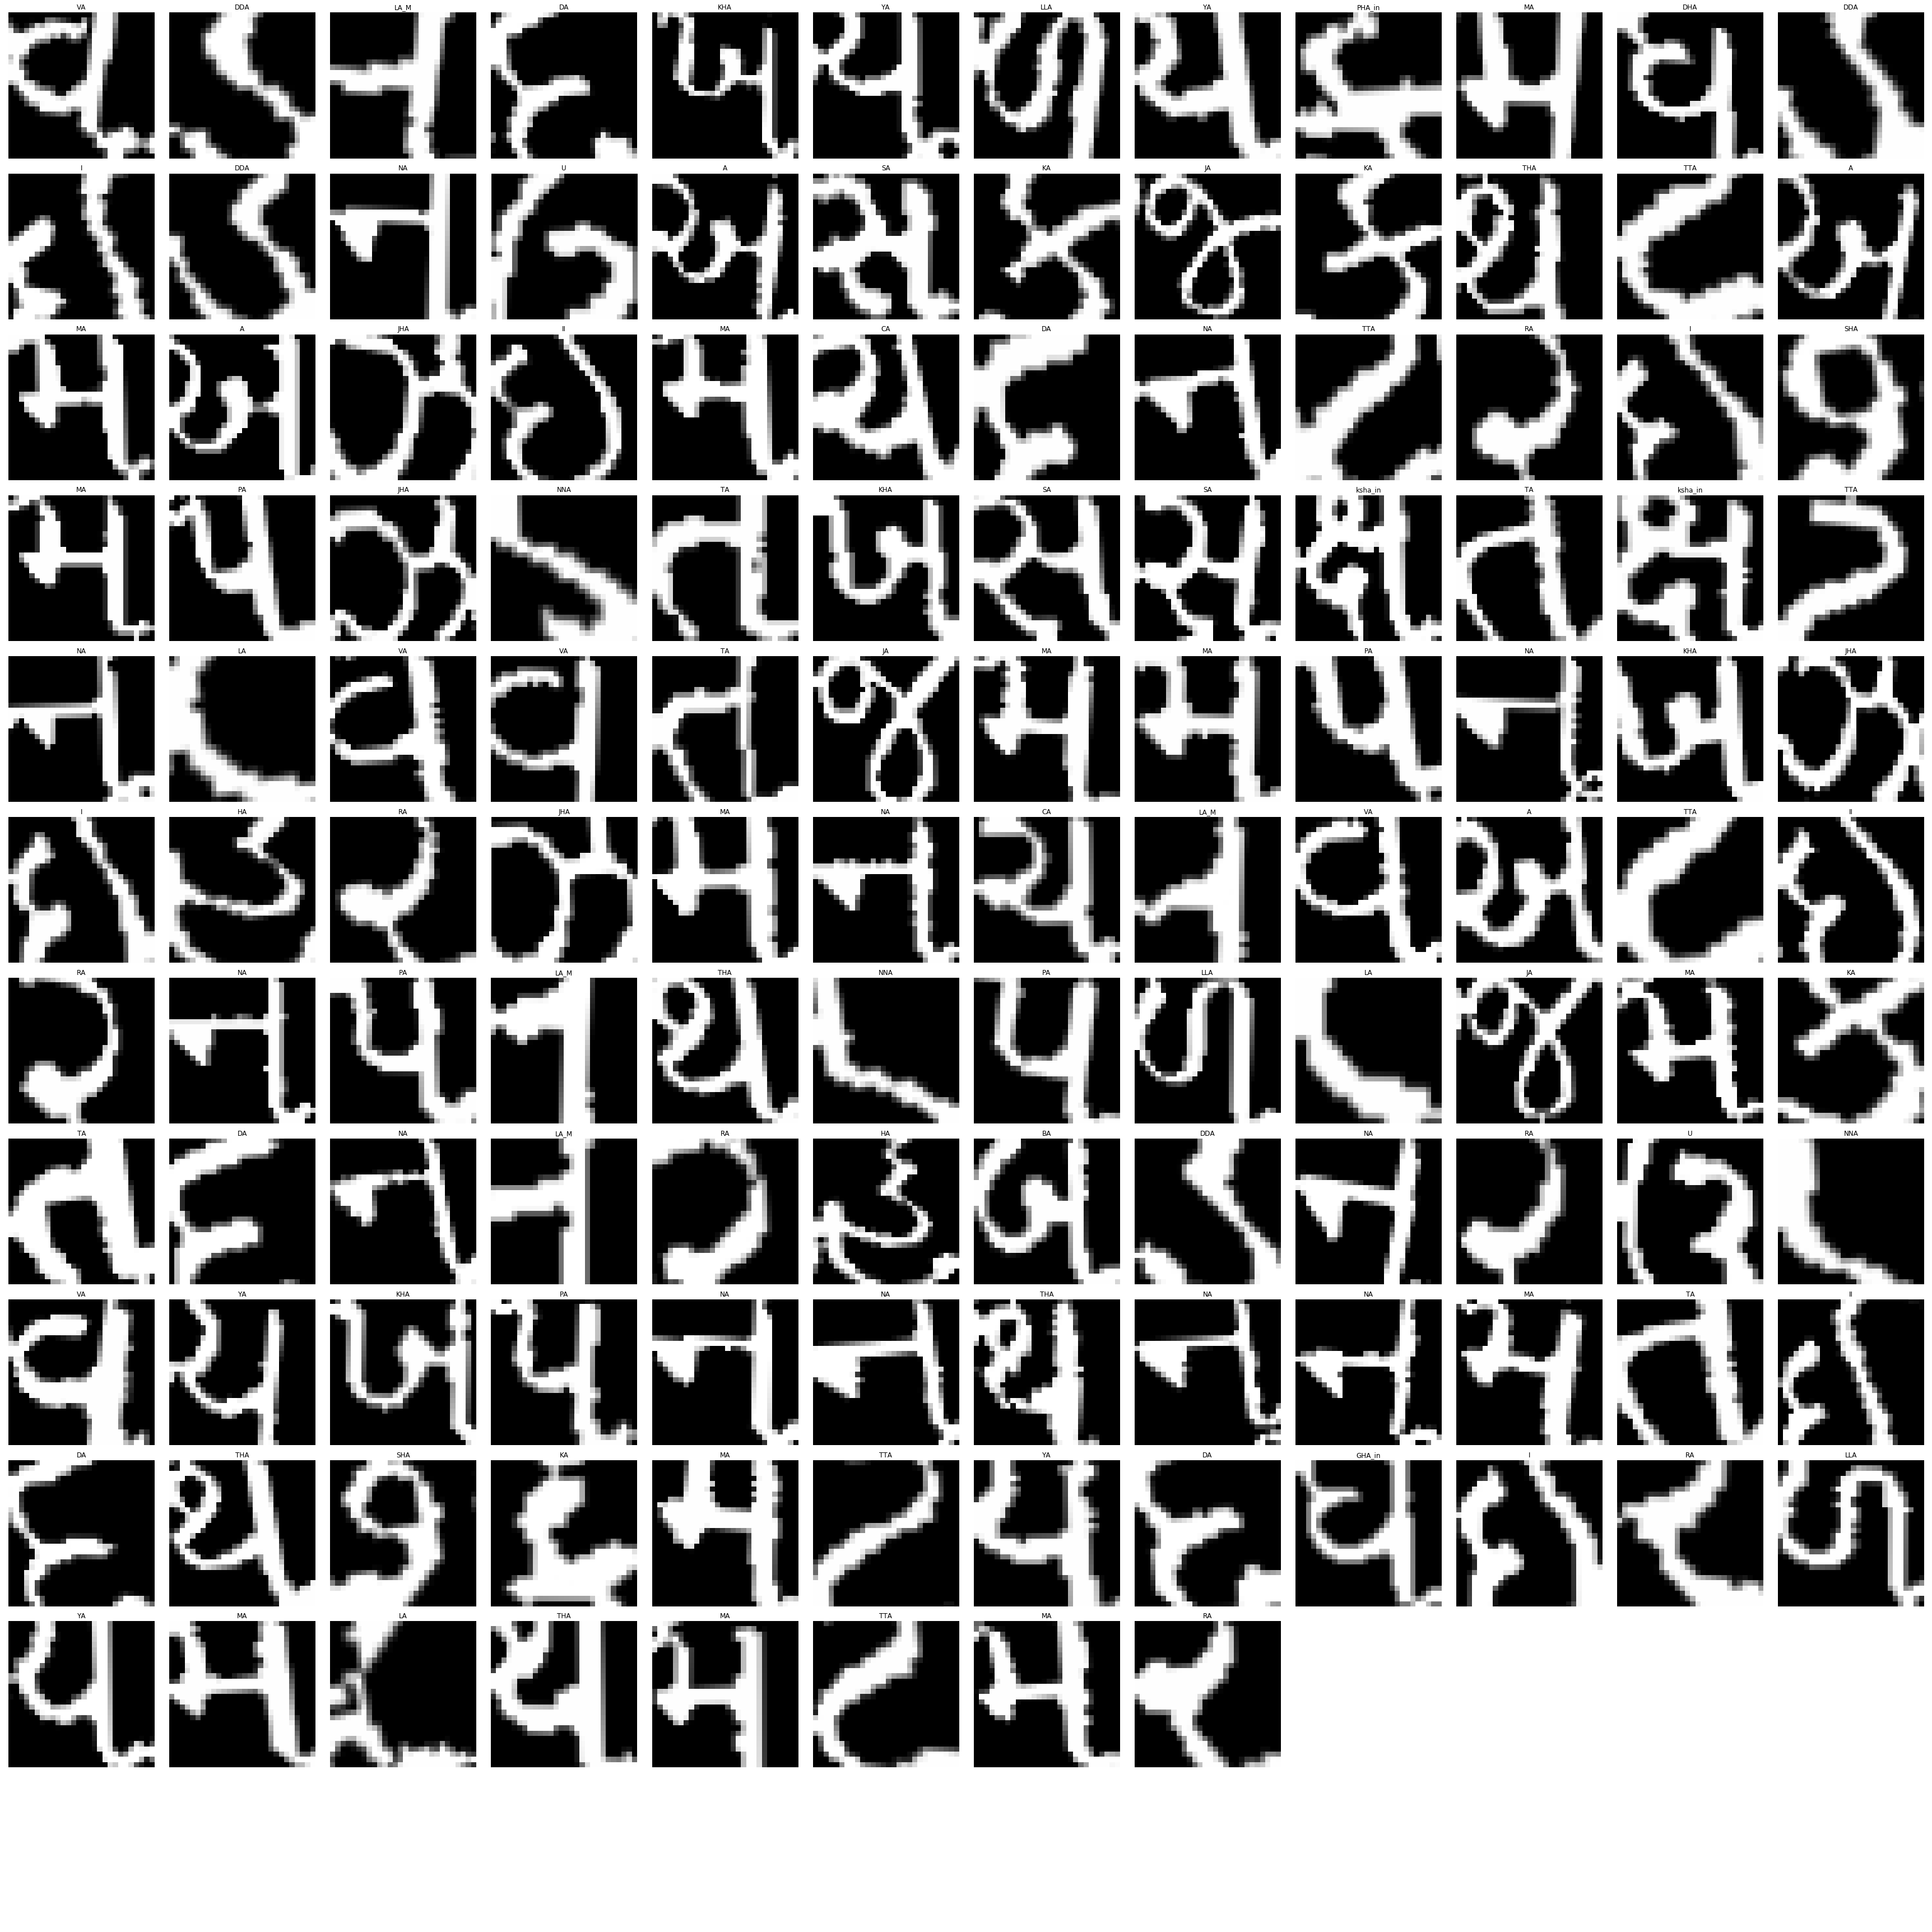

In [0]:
databunch.show_batch(20,)

In [0]:
model = create_cnn(databunch, models.resnet34, metrics = accuracy)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
model.load("resnet_34-1")

In [0]:
model.lr_find()

In [0]:
model.recorder.plot()

In [0]:
model.fit_one_cycle(4, 1e-2)

In [0]:
model.lr_find()

In [0]:
model.recorder.plot()

In [0]:
model.fit_one_cycle(7, 6e-4)

In [0]:
model.save("/content/resnet_34-1")

In [0]:
intrp = ClassificationInterpretation.from_learner(model)

In [0]:
intrp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [0]:
intrp.most_confused()

In [0]:
model.load('resnet-50-2')

Learner(data=ImageDataBunch;

Train: LabelList (4374 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
A,A,A,A,A
Path: Books;

Valid: LabelList (1093 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
NA,SA,LA,RA,II
Path: Books;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2

In [0]:
intrp = ClassificationInterpretation.from_learner(model)

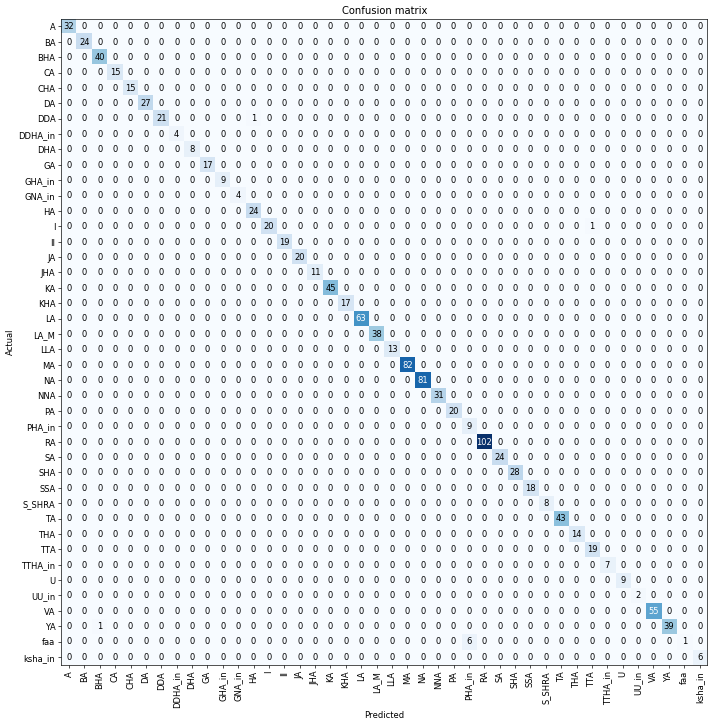

In [0]:
intrp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [0]:
intrp.most_confused()

[('faa', 'PHA_in', 6), ('DDA', 'HA', 1), ('I', 'TTA', 1), ('YA', 'BHA', 1)]

In [0]:
!mkdir "/content/gdrive/My Drive/guj-ocr-models"

In [0]:
!cp -r "/content/Books" "/content/gdrive/My Drive/guj-ocr-models/"

In [0]:
model2 = create_cnn(databunch, models.resnet50, metrics = accuracy)

In [0]:
model2.lr_find()

In [0]:
model2.recorder.plot()

In [0]:
model2.fit_one_cycle(5, 1e-2)

In [0]:
 model.lr_find()

In [0]:
model.recorder.plot()

In [0]:
model.fit_one_cycle(10, 5e-5)

In [0]:
model.save("resnet-50-3")

In [0]:
!cp -r "/content/Books/models" "/content/gdrive/My Drive/guj-ocr-models/"

In [0]:
model3 = cnn_learner(databunch, models.alexnet, metrics=accuracy)

In [0]:
model3.lr_find()

In [0]:
model3 = cnn_learner(databunch, models.xception, metrics = accuracy)

In [0]:
import numpy as np
a  = [[2, 0, 1], [-1, 1, 0], [-3, 3, 0]]
a = np.asarray(a, dtype=np.float64)
np.linalg.norm(a, ord=2)

4.723421263784789

In [0]:
import cupy as cp
b = cp.asarray(a)
cp.linalg.norm(a, ord=10)

ValueError: ignored